In [1]:
import cv2
import os
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
def load_image(path, resize=None):
    """load image, NOTE that opencv loads image in BGR, we convert it to RGB
    Args:
        path (str): image path
    Returns:
        img (np.ndarray)
    """
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    if resize:
        new_size = [int(img.shape[1]*resize), int(img.shape[0]*resize)]
        img = cv2.resize(img, new_size)
    return img

def show_image(img_list):
    n = len(img_list)
    fig, ax = plt.subplots(1, n, figsize=(5*n, 5))
    for i, img in enumerate(img_list):
        ax[i].imshow(img)

In [3]:
def poisson_blending(src_pth, dst_pth, 
                     mask_poly, center, 
                     blend_type=cv2.MIXED_CLONE,
                     src_resize=None, dst_resize=None):
    """Poisson Blending

    Args:
        src_pth: src pth.
        dst_pth: dst pth.
        mask_poly: range (0, 1), left-top, right-top, right-bottom, left-bottom. (h, w).
        center: range (0, 1), (h, w).
        blend_type: Defaults to cv2.MIXED_CLONE.
        src_resize: range (0, 1).
        dst_resize: range (0, 1).

    Returns:
        src, dst, src_mask, blended
    """
    
    # load src and dst image
    src = load_image(src_pth, src_resize)
    dst = load_image(dst_pth, dst_resize)
    
    # create the mask
    src_mask = np.zeros(src.shape, src.dtype)
    mask_poly_raw = mask_poly.copy()
    mask_poly[:, 0], mask_poly[:, 1] = mask_poly_raw[:, 1], mask_poly_raw[:, 0]
    mask_poly[:, 0] = mask_poly[:, 0] * src.shape[1]
    mask_poly[:, 1] = mask_poly[:, 1] * src.shape[0]
    poly = np.array(mask_poly, np.int32)
    src_mask = cv2.fillPoly(src_mask, [poly], (255, 255, 255))
    
    # poisson blend
    center_h = int(center[0] * dst.shape[0])
    center_w = int(center[1] * dst.shape[1])
    center = (center_w, center_h)
    assert blend_type in [cv2.MIXED_CLONE, cv2.NORMAL_CLONE], \
        f"blend type must be `cv2.MIXED_CLONE` or `cv2.NORMAL_CLONE`"
    blended = cv2.seamlessClone(src, dst, src_mask, center, blend_type)
    
    return src, dst, src_mask, blended

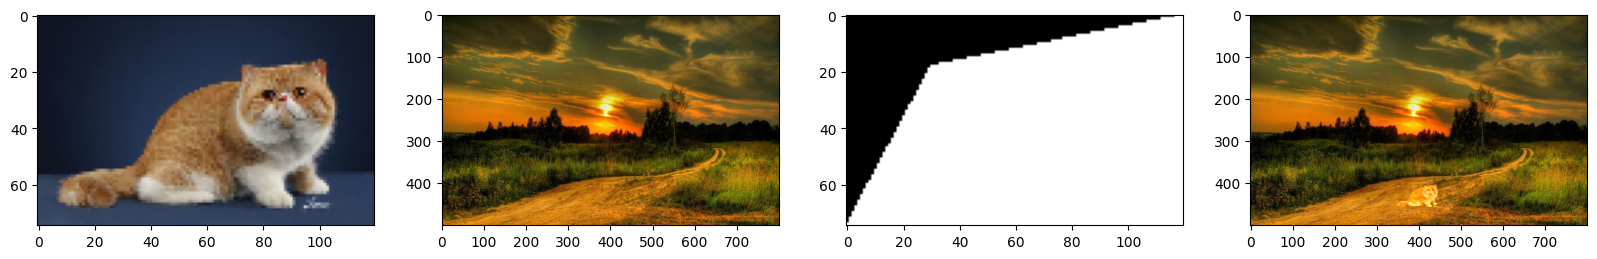

In [6]:
out = poisson_blending(
    src_pth="../figures/cat.jpg",
    dst_pth="../figures/ls1.jpg",
    src_resize=0.15, dst_resize=None,
    mask_poly=np.array([
        [0.25, 0.25],
        [0, 1],
        [1, 1],
        [1, 0]
    ]),
    center=(0.85, 0.5),
    # blend_type=cv2.NORMAL_CLONE
)
show_image(out)

In [ ]:
plt.imsave("../figures/catinls1.jpg", out[-1])

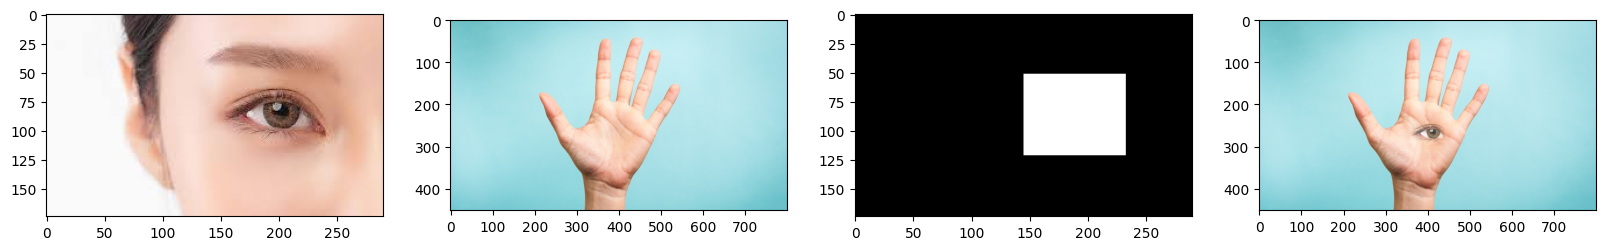

In [7]:
out = poisson_blending(
    src_pth="../figures/eye.jpg",
    dst_pth="../figures/hand.jpg",
    src_resize=None, dst_resize=None,
    mask_poly=np.array([
        [0.3, 0.5],
        [0.3, 0.8],
        [0.7, 0.8],
        [0.7, 0.5]
    ]),
    center=(0.6, 0.5)
)
show_image(out)

In [ ]:
plt.imsave("../figures/eyeinhand.jpg", out[-1])

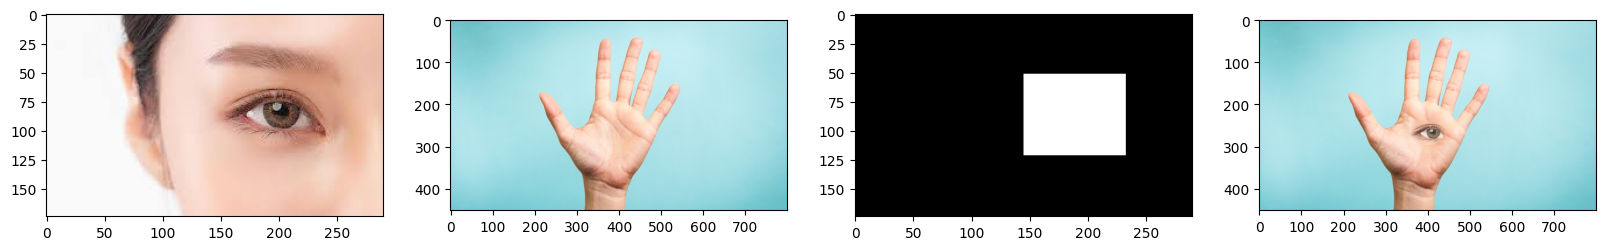

In [9]:
out = poisson_blending(
    src_pth="../figures/eye.jpg",
    dst_pth="../figures/hand.jpg",
    src_resize=None, dst_resize=None,
    mask_poly=np.array([
        [0.3, 0.5],
        [0.3, 0.8],
        [0.7, 0.8],
        [0.7, 0.5]
    ]),
    center=(0.6, 0.5),
    # blend_type=cv2.NORMAL_CLONE
)
show_image(out)

In [ ]:
plt.imsave("../figures/eyeinhand_normal.jpg", out[-1])

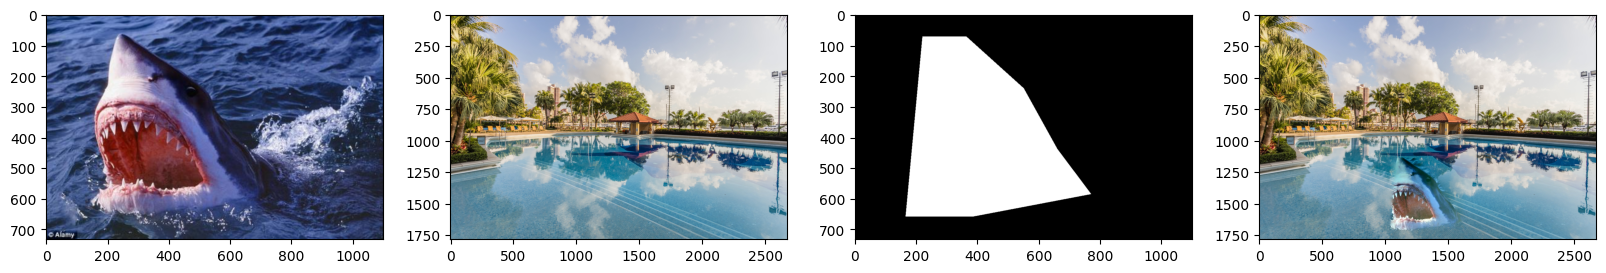

In [10]:
out = poisson_blending(
    src_pth="../figures/shark.jpg",
    dst_pth="../figures/swimpool.jpg",
    src_resize=2, dst_resize=None,
    mask_poly=np.array([
        [0.1, 0.2],
        [0.1, 0.33],
        [0.33, 0.5],
        [0.6, 0.6],
        [0.8, 0.7],
        [0.9, 0.35],
        [0.9, 0.15]
    ]),
    center=(0.8, 0.5),
    # blend_type=cv2.NORMAL_CLONE
)
show_image(out)

In [11]:
plt.imsave("../figures/sharkinpool_normal.jpg", out[-1])

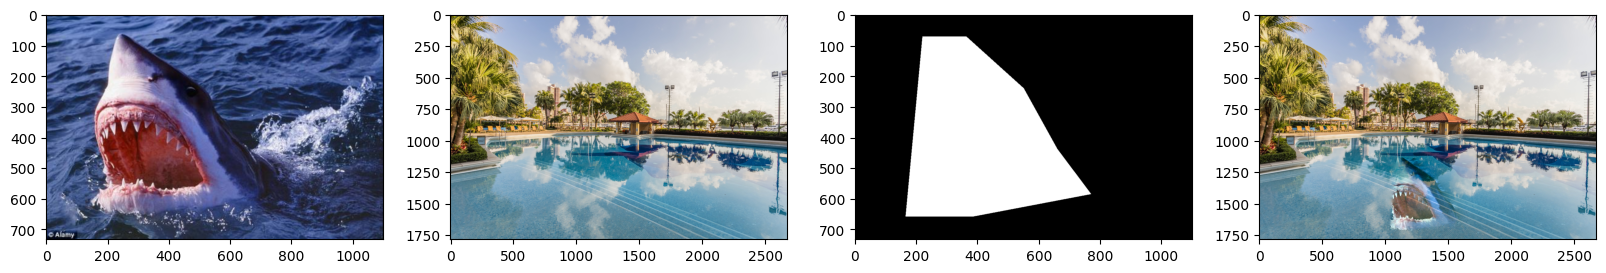

In [12]:
out = poisson_blending(
    src_pth="../figures/shark.jpg",
    dst_pth="../figures/swimpool.jpg",
    src_resize=2, dst_resize=None,
    mask_poly=np.array([
        [0.1, 0.2],
        [0.1, 0.33],
        [0.33, 0.5],
        [0.6, 0.6],
        [0.8, 0.7],
        [0.9, 0.35],
        [0.9, 0.15]
    ]),
    center=(0.8, 0.5),
)
show_image(out)

In [ ]:
plt.imsave("../figures/sharkinpool.jpg", out[-1])

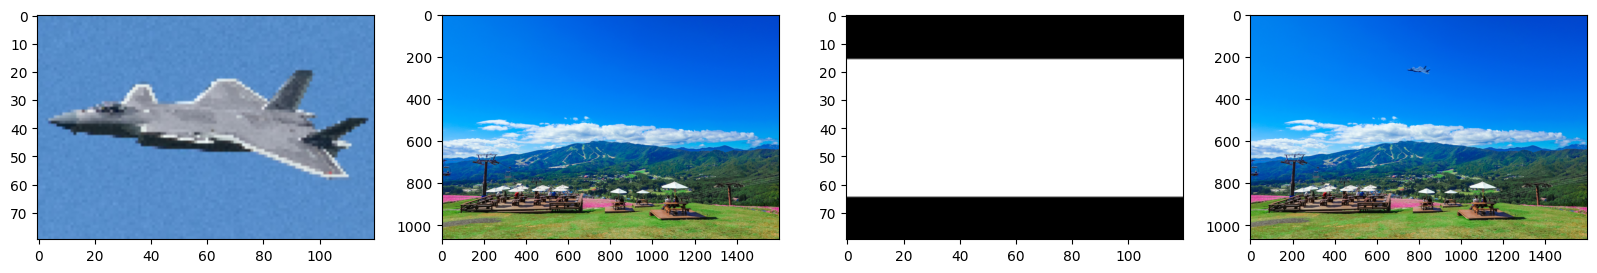

In [13]:
out = poisson_blending(
    src_pth="../figures/plane.jpg",
    dst_pth="../figures/ls2.jpg",
    src_resize=0.1, dst_resize=None,
    mask_poly=np.array([
        [0.2, 0],
        [0.2, 1],
        [0.8, 1],
        [0.8, 0],
    ]),
    center=(0.25, 0.5),
)
show_image(out)

In [ ]:
plt.imsave("../figures/planeinls2.jpg", out[-1])

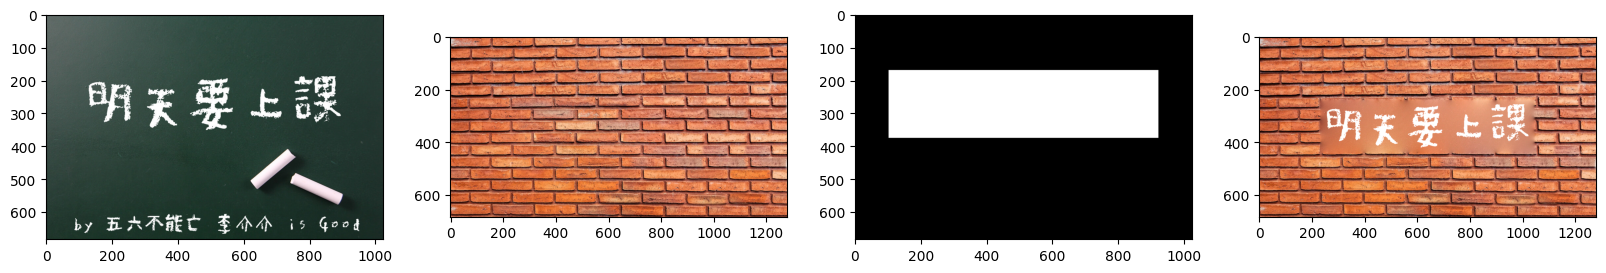

In [15]:
out = poisson_blending(
    src_pth="../figures/bb.jpg",
    dst_pth="../figures/brick.jpg",
    src_resize=None, dst_resize=None,
    mask_poly=np.array([
        [0.25, 0.1],
        [0.25, 0.9],
        [0.55, 0.9],
        [0.55, 0.1],
    ]),
    center=(0.5, 0.5),
    blend_type=cv2.NORMAL_CLONE
)
show_image(out)

In [ ]:
plt.imsave("../figures/bbinbrick.jpg", out[-1])